# Temperature Example

Goal: We want to smooth temperature data for each region (e.g. Africa, Europe).

## Dependencies & Seaborn Theme

Install `lowess-grouped` package directly from source code:

In [1]:
!pip install -e ../. -q

Install further dependencies for plotting:

In [2]:
!pip install -r requirements.txt -q

Import dependencies & set seaborn theme.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from lowess_grouped.lowess_grouped import lowess_grouped

In [4]:
sns.set_theme(style="white")

## Original data

We have the temperature data by year, foreach region.
As can be seen in the plot below, the original data is quite sharp and chaotic.

In [5]:
temp_region = pd.read_csv("./data/temperature-by-region.csv")
temp_region.head(3)

,year,region_code,temperature_anomaly,region_name
0,1900,2.0,-0.016705,Africa
1,1900,9.0,-0.307362,Oceania
2,1900,19.0,-0.160803,Americas


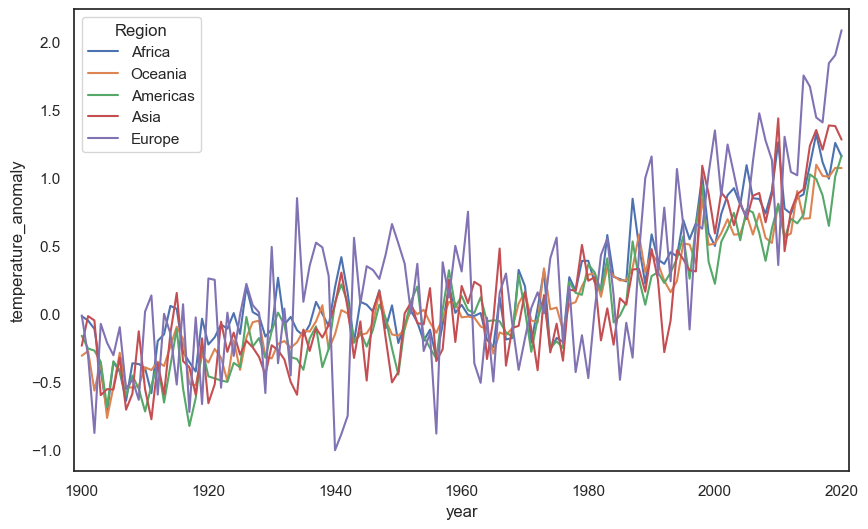

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.01)
plot = sns.lineplot(x="year", y="temperature_anomaly", hue="region_name", data=temp_region, ax=ax)
plot.get_legend().set_title("Region");

## Smoothed data

Now let's smooth the data with lowess, for each region.
The `frac` parameter specifies how strongly the data should be smoothed.
The `smoothed_col_suffix` parameter is optional and specifies the suffix of the smoothed column.

In [7]:
temp_region = lowess_grouped(temp_region,"year", "temperature_anomaly", "region_name", smoothed_col_suffix="_smooth", frac=0.05)

The output of `lowess_grouped` includes a new column for the smoothed temperature data `temperature_anomaly_smooth`.

In [8]:
temp_region.head(3)

,year,region_code,temperature_anomaly,region_name,temperature_anomaly_smooth
0,1900,2.0,-0.016705,Africa,0.029955
1,1900,9.0,-0.307362,Oceania,-0.292418
2,1900,19.0,-0.160803,Americas,-0.164371


If we look at the plot, we can see that the data is much more smooth!

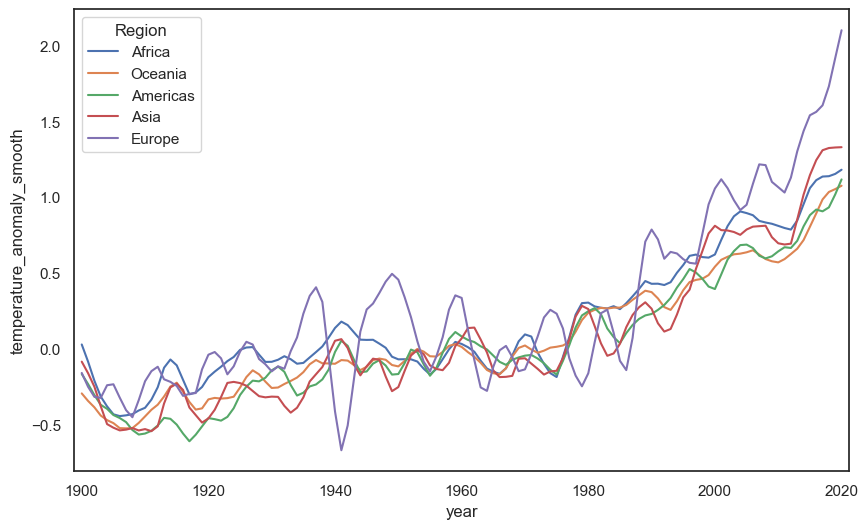

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.01)
plot = sns.lineplot(x="year", y="temperature_anomaly_smooth", hue="region_name", data=temp_region, ax=ax)
plot.get_legend().set_title("Region");

## More

If your dataframe has column-names that are tuples (this can happen when aggregating), then you can specify the `smoothed_col_suffix` for each part of the tuple:

In [10]:
temp_region2 = temp_region.rename(columns={'temperature_anomaly': ('temperature_anomaly','median')})
temp_region2 = lowess_grouped(temp_region2, "year", ('temperature_anomaly','median'), "region_name", smoothed_col_suffix=("_smooth","_smooth2"), frac=0.05)
temp_region2

,year,region_code,"(temperature_anomaly, median)",region_name,temperature_anomaly_smooth,"(temperature_anomaly_smooth, median_smooth2)"
0,1900,2.0,-0.016705,Africa,0.029955,0.029955
1,1900,9.0,-0.307362,Oceania,-0.292418,-0.292418
2,1900,19.0,-0.160803,Americas,-0.164371,-0.164371
3,1900,142.0,-0.234047,Asia,-0.083191,-0.083191
4,1900,150.0,-0.011170,Europe,-0.157492,-0.157492
...,...,...,...,...,...,...
600,2020,2.0,1.156635,Africa,1.181088,1.181088
601,2020,9.0,1.071382,Oceania,1.075620,1.075620
602,2020,19.0,1.162807,Americas,1.117247,1.117247
603,2020,142.0,1.280441,Asia,1.329610,1.329610
